In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
eigenvalores [0.0490834  1.28402771]
eigenvectores [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


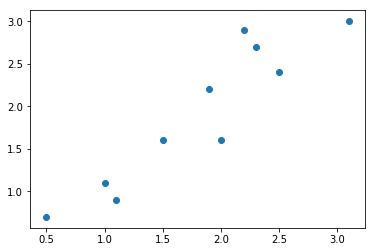

In [36]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
data = np.vstack([x,y])
cov = np.cov(x,y)
eigen = np.linalg.eig(cov)
mat = np.matrix(eigen[1])
plt.scatter(x,y)
print cov
print 'eigenvalores', eigen[0]
print 'eigenvectores', eigen[1]#[0,0]

In [37]:
print mat, data

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]] [[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
 [2.4 0.7 2.9 2.2 3.  2.7 1.6 1.1 1.6 0.9]]


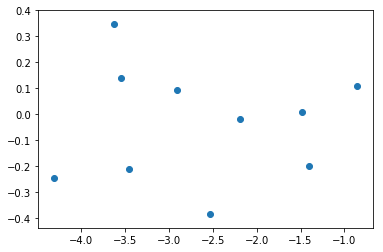

In [116]:
new_data = np.asarray(np.matmul(np.transpose(mat), data))
plt.scatter(new_data[[1]],new_data[[0]])

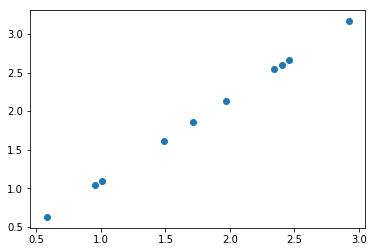

In [114]:
data_reduced = np.asarray(np.matmul(np.transpose(np.matrix([mat[0,1],mat[1,1]])),(np.matrix(new_data[1]))))
plt.scatter(data_reduced[0],data_reduced[1])

# Funcion bines EoS DE

In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
#w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
w_i = [1,1,1,1,1,1,2,2]
z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]
z=np.linspace(0.0,2.5,100)
print len(w_i)
print len(z_i)
print len(z)

8
9
100


[1, 1, 1, 1, 1, 1, 2, 2]


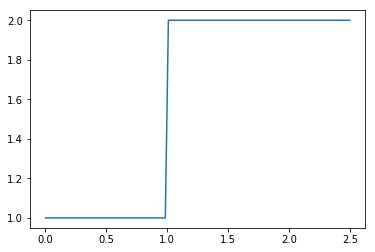

In [111]:
#intento del peiper,smoothing funct https://www.j-raedler.de/2010/10/smooth-transition-between-functions-with-tanh/
w_z=[]
def bines(w_2,w_1,z_2,z_1,eta):
    return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2

for ii in range(len(z)):
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z[ii],z_i[jj+1],0.001)
    w_z.append(w)
print w_i
plt.plot(z,w_z)

In [126]:
from scipy.integrate import quad

#ecuacion de estado de la energia oscura en forma de bines

def eos(z):
    w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
    #w_i = [1,1,1,1,1,1,2,2]
    z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
    return w
    

In [127]:
#valor de la integral para la rho de la energia oscura
z_intervalo=2.5
#quad(lambda b: 3.0*(1.0+eos(b))/(1.0+b),0.0,z_intervalo)[0]
r=quad(lambda b: eos(b)/2.0,0.0,z_intervalo)[0]
print r

-1.515


In [128]:
eos(0.9)

-0.9

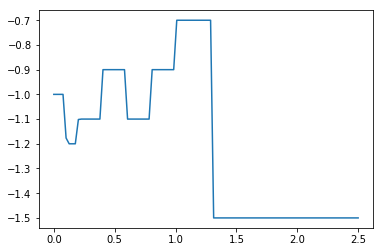

In [129]:
plt.plot(z,eos(z))

In [10]:
eos(2)

-1.5

In [9]:
#aqui ya esta la funcion lista en una sola definicion que devuelve el valor de la integral para SimpleMC
def luisfunction(z_l):
    def eos(z):
        w_i = [-1,-1.2,-1.1,-0.9,-1.1,-0.9,-0.7,-1.5]
        z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]
        def bines(w_2,w_1,z_2,z_1,eta):
            return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
        w=w_i[0]
        for jj in range(len(w_i)-1):
            w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
        return w
    return quad(lambda b: 3*(1+eos(b))/(1+b),0,z_l)[0]

In [10]:
luisfunction(3.0)

C:\Users\52811\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if sys.path[0] == '':


-0.7664116149656833

In [103]:
#aqui ya esta la funcion lista en una sola definicion que devuelve el valor de la integral para SimpleMC
#pero aqui esta por partes, en lugar de estar definida en una sola funcion
def bines(w_2,w_1,z_2,z_1,eta):
    return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2

def eos(z):
    w_i = [-10,10,-1,-1,-1,-1,-1,-20]
    z_i = [0,0.1,0.2,0.4,0.6,0.8,1.0,1.3,2.5]        
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],0.001)
    return w


def luisfunction(z_l):
    return quad(lambda b: 3*(1+eos(b))/(1+b),0,z_l)[0]

def hz(a):
    z=1.0/a -1
    return (0.28/a**3+(0.7)*(np.exp(luisfunction(z))))

In [104]:
luisfunction(0.79)

0.2980115536020208

In [105]:
np.exp(luisfunction(0.79))

1.3471773525406225

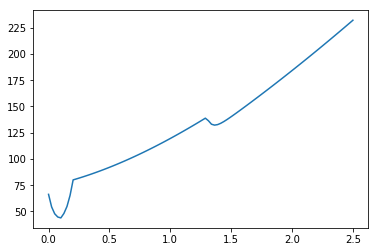

In [108]:
#prueba graficando el parametro de jobol (hubble)

hubble=[]
aa =[]
for ii in range(len(z)):
    aa.append(1.0/(1.0+z[ii]))
    hubble.append(67*(hz(aa[ii])**0.5))
plt.plot(z,hubble)

# Interpolacion

In [4]:
from scipy.interpolate import interp1d
from scipy.integrate import quad
def luisfunction(z):
        if (z>=0.0 and z<=3.0):
            y = [ 2.0, 2.0, 2.0,  0.0]
            x = [ 0.0, 1.0, 2.0,  3.0]
            f = interp1d(x, y, kind='linear')
            rhow = f(z)
        else:
            rhow = -1.0
        resultado = quad(lambda b: rhow, 0.0, z )
        return resultado[0]

In [5]:
luisfunction(3.0)

0.0

In [172]:
y = [ 2.0, 2.0, 2.0,  1.0]
x = [ 0.0, 1.0, 2.0,  3.0]
f = interp1d(x, y, kind='linear')
rhow = f(3)

In [173]:
quad(lambda b: rhow, 0.0, 3 )[0]

3.0

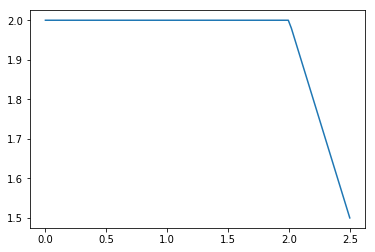

In [174]:
plt.plot(z,f(z))

# Prueba iris-setosa

In [6]:
import pandas as pd

# load dataset into Pandas DataFrame
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


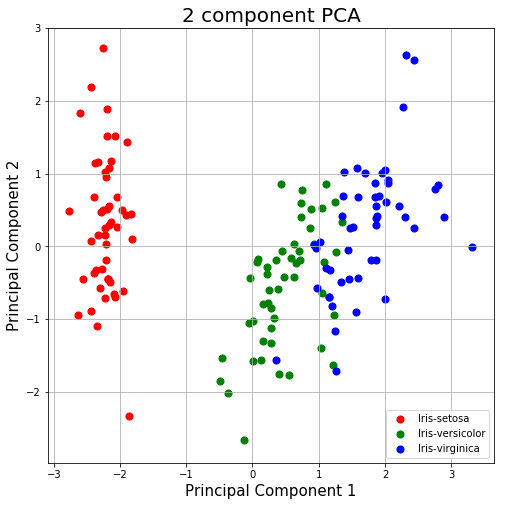

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Prueba cadenas owaCDM

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
dir_name = u'C:\\Users\\52811\\cosas_python\\SimpleMC-master\\chains_pca\\'

num_cadenas = 4

df1=pd.DataFrame()

for i in range(num_cadenas):
    dg = pd.read_csv(dir_name+'owaCDM2_phy_BBAO+SN+HD_'+str(i+1)+'.txt', sep='\s+', names=range(21))
    df1 = pd.concat([df1,dg])
    

df1.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,3.422770e-08,34.3805,0.273375,0.022570,0.671650,-1.210200,-0.783771,-0.931326,-1.20521,-1.08229,...,-1.38604,-0.091940,-1.38050,-0.872042,-1.90805,-0.000202,-1.024780,-17.4259,-10.9613,-0.715721
1,2.519780e-08,36.3793,0.270702,0.022534,0.650538,-1.202980,-0.768726,-0.855344,-1.22204,-1.06058,...,-1.43862,-0.750095,-1.20097,-0.554546,-2.66105,-0.021655,-0.557827,-17.7322,-12.2770,-0.624025
2,1.851770e-08,35.6091,0.289326,0.022395,0.660180,-1.087100,-0.730883,-0.962856,-1.03140,-1.14549,...,-1.26045,-0.019958,-2.79618,-1.348600,-1.48507,-0.014287,-0.769406,-17.7682,-11.0753,-0.332037
3,1.573080e-07,34.1027,0.281314,0.022603,0.649340,-1.008480,-0.819688,-0.994546,-1.14205,-1.05941,...,-1.23207,-0.120687,-1.24485,-0.590725,-2.22128,-0.015074,-0.742644,-16.8290,-11.5345,-0.803957
4,1.302370e-07,33.9050,0.287829,0.022483,0.649950,-0.965794,-0.819898,-0.974392,-1.07458,-1.03297,...,-1.22571,-0.088179,-1.42484,-0.844115,-1.94515,-0.020182,-0.719417,-17.2251,-11.1315,-0.506494


In [2]:
from sklearn.preprocessing import StandardScaler
features = [5,6,7,8,9,10,11]
# Separating out the features
x = df1.loc[:, features].values
x2 = pd.DataFrame(x)
# Separating out the target
#y = df1.loc[:,['target']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)
np.shape(X)

(220904L, 7L)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2
0,-0.245636,-0.071215,0.224291
1,-0.340329,-0.086466,0.300195
2,-0.421786,-0.182424,0.092439
3,-0.361729,-0.060688,0.092740
4,-0.410218,-0.092214,0.012462


In [4]:
#sin renormalizar los datos
from sklearn.decomposition import PCA

features = [5,6,7,8,9,10,11]

df2 = df1.loc[:, features].values
pca = PCA(n_components=4)
pca_prueba = pca.fit_transform(df2)
componentes_principales = pd.DataFrame(data = pca_prueba)
componentes_principales.head()

,0,1,2,3
0,0.330313,0.503934,0.644882,0.024981
1,0.349028,0.609791,0.731433,-0.038577
2,0.333830,0.309802,0.375669,0.102877
3,0.231525,0.313160,0.487832,0.077653
4,0.251967,0.222325,0.434079,0.110793


In [5]:
datos_redux = pca.inverse_transform(pca_prueba)
dat_red = pd.DataFrame(data = datos_redux)
dat_red.head()

,0,1,2,3,4,5,6
0,-1.146477,-0.897421,-1.316047,-1.464658,-1.327842,-0.545822,-1.399886
1,-1.132643,-0.887937,-1.285044,-1.510470,-1.334179,-0.416312,-1.454036
2,-1.165143,-0.911941,-1.333454,-1.343649,-1.415440,-0.824458,-1.275685
3,-1.153629,-0.903370,-1.338187,-1.438409,-1.314328,-0.766164,-1.246284
4,-1.159799,-0.907964,-1.350356,-1.409991,-1.318025,-0.873895,-1.241580


In [6]:
print('Promedios antes de PCA')
for ii in range(7):
    print np.mean(x2[ii])
print('Promedios despues de PCA')
for ii in range(7):
    print np.mean(dat_red[ii])

Promedios antes de PCA
-1.12628818906
-0.891168133272
-1.25205324247
-1.41321716446
-1.47136592666
-1.1867929482
-0.816001040653
Promedios despues de PCA
-1.12628818906
-0.891168133272
-1.25205324247
-1.41321716446
-1.47136592666
-1.1867929482
-0.816001040653


In [7]:
resta = x2-dat_red

In [8]:
np.mean(resta[0])

1.6273393622638214e-16

# Prueba con matriz de covarianza como en el peiper https://iopscience.iop.org/article/10.3847/1538-4357/aab49a/pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

matriz_cov = np.loadtxt('owaCDM2_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [-1.0048, -0.697779, -0.422577, -1.16662, -2.97, -2.38769,-0.849161]
z = [ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

print('Eigenvalores de matriz de fisher')
print(fish_eig[0])
print('Matriz Eigenvectores de Fisher')
print(fish_eig[1])

Eigenvalores de matriz de fisher
[246.04672283  18.51863005   2.59906183   1.52379752   0.99891434
   0.72011191   0.8156775 ]
Matriz Eigenvectores de Fisher
[[-0.46766878  0.81503957  0.22850604  0.23371755  0.09712529 -0.02204245
   0.01543757]
 [-0.81181653 -0.54904488  0.14103623  0.12604934  0.0581121  -0.01457624
   0.01159778]
 [ 0.33054702 -0.17357961  0.75246849  0.54032754 -0.03178334 -0.01863378
   0.03299571]
 [-0.10662633  0.06305064  0.41518681 -0.52496603 -0.71836836  0.08505581
  -0.11575161]
 [ 0.03972618 -0.01094385  0.43112458 -0.58477463  0.6775486  -0.05656282
  -0.09055848]
 [-0.00544637  0.00472256  0.04834697 -0.07852103  0.05481136  0.69691115
   0.70905262]
 [ 0.00122775  0.00358905  0.03315151 -0.11754818 -0.08972177 -0.70910892
   0.68860988]]


In [8]:
#solo para ver que se cumple la relacion de la matriz de fisher y sea cero la resta
np.matmul(wt,np.matmul(d,w))-fisher

matrix([[-7.10542736e-14, -1.27897692e-13,  5.68434189e-14,
         -7.10542736e-15,  6.21724894e-15, -4.44089210e-16,
         -2.49800181e-16],
        [-1.27897692e-13, -1.13686838e-13, -2.13162821e-14,
         -3.55271368e-15,  4.44089210e-15, -6.66133815e-16,
         -8.88178420e-16],
        [ 4.26325641e-14, -2.13162821e-14,  0.00000000e+00,
          0.00000000e+00, -1.77635684e-15,  1.66533454e-16,
          4.71844785e-16],
        [-5.32907052e-15,  0.00000000e+00,  0.00000000e+00,
          3.55271368e-15,  1.88737914e-15, -8.32667268e-17,
         -4.16333634e-17],
        [ 5.32907052e-15,  2.66453526e-15, -1.77635684e-15,
          1.77635684e-15,  2.66453526e-15,  8.32667268e-16,
          4.16333634e-16],
        [-1.11022302e-16,  0.00000000e+00, -1.11022302e-16,
         -8.32667268e-17,  7.21644966e-16, -2.22044605e-16,
         -3.46944695e-17],
        [ 1.66533454e-16, -1.66533454e-16,  1.66533454e-16,
          2.77555756e-17,  4.02455846e-16,  1.38777878e-17

In [9]:
print w
print w[0]*np.asscalar(q[0])

[[-0.46766878 -0.81181653  0.33054702 -0.10662633  0.03972618 -0.00544637
   0.00122775]
 [ 0.81503957 -0.54904488 -0.17357961  0.06305064 -0.01094385  0.00472256
   0.00358905]
 [ 0.22850604  0.14103623  0.75246849  0.41518681  0.43112458  0.04834697
   0.03315151]
 [ 0.23371755  0.12604934  0.54032754 -0.52496603 -0.58477463 -0.07852103
  -0.11754818]
 [ 0.09712529  0.0581121  -0.03178334 -0.71836836  0.6775486   0.05481136
  -0.08972177]
 [-0.02204245 -0.01457624 -0.01863378  0.08505581 -0.05656282  0.69691115
  -0.70910892]
 [ 0.01543757  0.01159778  0.03299571 -0.11575161 -0.09055848  0.70905262
   0.68860988]]
[[-0.42794868 -0.74286723  0.30247296 -0.09757033  0.03635215 -0.0049838
   0.00112348]]


In [11]:
n_pca = 3

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
print pt
print wz
print np.sqrt(np.diag(matriz_cov))
print sigma_wz

[[-1.0048   -0.697779 -0.422577 -1.16662  -2.97     -2.38769  -0.849161]]
[[-1.35221804 -0.87370103 -1.54708805 -1.18446386 -1.0603328  -0.13045396
  -0.08505798]]
[0.32110426 0.20218183 0.64369769 0.88911654 0.8775012  1.13963939
 1.13892988]
[0.23843296 0.16312568 0.46895874 0.25804039 0.26744445 0.03001101
 0.02058046]


In [12]:
d

array([[246.04672283,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,  18.51863005,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.59906183,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.52379752,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.99891434,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.72011191,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.8156775 ]])

<ErrorbarContainer object of 3 artists>

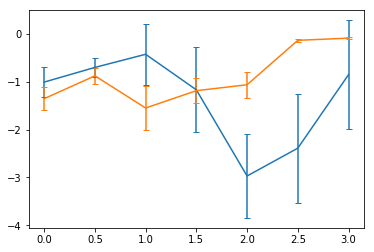

In [13]:
plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3)
plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3)